# PART 3

In [1]:
import re
import nltk
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geogh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = pd.read_csv("https://raw.githubusercontent.com/vavaidya/TextAnalytics/branch-vikrant/HW1/results_recent.csv", sep="\t")
raw.drop(['Unnamed: 0'],axis=1,inplace=True)
print (raw.shape)
raw.head(10)

(5000, 3)


,Date,user_id,comments
0,"June 12, 2019 2:41PM",marcogallo1986,Do you GC not bad because back in November aw...
1,"June 12, 2019 3:00PM",suydam,But the Tacoma would not help with your gas co...
2,"June 12, 2019 3:03PM",Michaell,"I'm about ready to cross the 16,000 mile thres..."
3,"June 12, 2019 3:05PM",28firefighter,"@nyccarguy From my perspective, the miles you ..."
4,"June 12, 2019 3:09PM",tjc78,I wouldn't mind a Q sedan at all. I know peopl...
5,"June 12, 2019 3:54PM",sda,I think your Intrigue with the 3.5 Shortstar s...
6,"June 12, 2019 3:59PM",stickguy,"Bradd, the Honcker deal earlier this year was ..."
7,"June 12, 2019 4:08PM",nyccarguy,28firefighter said:\n@nyccarguy From my perspe...
8,"June 12, 2019 4:09PM",andres3,28firefighter said:\nshow previous quotes\n\n\...
9,"June 12, 2019 4:11PM",stickguy,selling something like that you just breath a ...


In [3]:
# DATA CLEANSING

def remove_space(s):
    return s.replace("\n"," ")

def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def lowerize(x):
    return x.lower()

stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

def lematize(l):
    s=[]
    for i in l:
        i=i.lower()
        if i in modeldict:
            s.append(modeldict[i])
        else:
            s.append(wordnet_lemmatizer.lemmatize(i))
    return s


In [4]:
models = pd.read_csv("models.csv")
data = raw.copy()
data = data.dropna()
#data['comments'] = data['comments'].apply(removepunc).apply(lowerize).apply(remove_stopwords)
data['comments'] = data['comments'].apply(remove_space).apply(removepunc).apply(lowerize)
data.head()

,Date,user_id,comments
0,"June 12, 2019 2:41PM",marcogallo1986,do you gc not bad because back in november awe...
1,"June 12, 2019 3:00PM",suydam,but the tacoma would not help with your gas co...
2,"June 12, 2019 3:03PM",Michaell,im about ready to cross the 16000 mile thresho...
3,"June 12, 2019 3:05PM",28firefighter,nyccarguy from my perspective the miles you pu...
4,"June 12, 2019 3:09PM",tjc78,i wouldnt mind a q sedan at all i know people ...


In [5]:
models = models.set_index("Model")
data_dict = models.to_dict() # converting to dict
modeldict=data_dict["Brand"]

wordnet_lemmatizer = WordNetLemmatizer()

data['comments_word'] = data['comments'].apply(word_tokenize).apply(set).apply(list)

data['comments_replace_model'] = data['comments_word'].apply(lematize).apply(set)

data['comments_final_words'] =  data['comments_replace_model'].apply(remove_stopwords)

data.head()

,Date,user_id,comments,comments_word,comments_replace_model,comments_final_words
0,"June 12, 2019 2:41PM",marcogallo1986,do you gc not bad because back in november awe...,"[back, awesome, in, november, bad, do, because...","{awesome, back, november, in, bad, do, because...","[awesome, back, november, bad, gc]"
1,"June 12, 2019 3:00PM",suydam,but the tacoma would not help with your gas co...,"[tacoma, consumption, problem, but, your, with...","{consumption, problem, but, your, not, with, g...","[consumption, problem, gas, toyota, would, help]"
2,"June 12, 2019 3:03PM",Michaell,im about ready to cross the 16000 mile thresho...,"[payments, 31xxx, im, jetta, ready, mile, 1600...","{volkswagen, 31xxx, im, ready, subaru, mile, 1...","[volkswagen, 31xxx, im, ready, subaru, mile, 1..."
3,"June 12, 2019 3:05PM",28firefighter,nyccarguy from my perspective the miles you pu...,"[lot, period, my, q40, miles, this, high, righ...","{lot, period, my, q40, this, fault, high, righ...","[lot, period, q40, fault, high, right, make, b..."
4,"June 12, 2019 3:09PM",tjc78,i wouldnt mind a q sedan at all i know people ...,"[wouldnt, my, be, but, all, a, certainly, not,...","{wouldnt, my, be, but, all, a, certainly, not,...","[wouldnt, certainly, worse, people, q, technol..."


In [6]:
data.reset_index(inplace  = True)

In [7]:
word_bag = []
for i in range(data.shape[0]):
    word_bag += data['comments_final_words'][i]

#word_bag

word_freq = nltk.FreqDist(word_bag)

In [8]:
rslt = pd.DataFrame(word_freq.most_common(500),              
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,said,1923
1,’,1361
2,car,1352
3,wa,1329
4,like,1195


In [9]:
model_list = list(models["Brand"].drop_duplicates())
top_10_brands = rslt[rslt["Word"].isin(model_list)].reset_index(drop='True')[:10]
top_10_brands

,Word,Frequency
0,audi,312
1,honda,297
2,volkswagen,296
3,chevrolet,277
4,subaru,247
5,toyota,230
6,acura,221
7,volvo,210
8,bmw,197
9,hyundai,170


In [10]:
def check_co_occ(brand_A,brand_B,post):
    if(brand_A in post and brand_B in post):
        return 1;
    else:
        return 0;



In [11]:
comments = data['comments_final_words']


co_exist_num = {}
#model_list = list(models["Brand"].drop_duplicates())
model_list = list(top_10_brands['Word'])
for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B] = 0



In [12]:
for comment in comments:
    for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B]+=check_co_occ(brand_A,brand_B,comment)
        

In [13]:
mat = pd.DataFrame.from_dict(co_exist_num, orient = 'index').values.reshape(10,10)
df = pd.DataFrame(mat).set_index(pd.Series(top_10_brands['Word']))
df.columns = top_10_brands['Word']
df

Word,audi,honda,volkswagen,chevrolet,subaru,toyota,acura,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,312,47,59,21,19,9,27,33,23,16
honda,47,297,40,19,28,44,49,29,24,25
volkswagen,59,40,296,26,31,20,21,18,18,29
chevrolet,21,19,26,277,6,29,6,8,8,17
subaru,19,28,31,6,247,21,31,24,21,19
toyota,9,44,20,29,21,230,13,10,13,19
acura,27,49,21,6,31,13,221,40,19,12
volvo,33,29,18,8,24,10,40,210,21,19
bmw,23,24,18,8,21,13,19,21,197,11


In [14]:
N=len(comments)
lift=df

for i in range(10):
    for j in range(10):
        lift.iloc[i,j]=N*df.iloc[i,j]/(top_10_brands['Frequency'].iloc[i]*top_10_brands['Frequency'].iloc[j])
lift

Word,audi,honda,volkswagen,chevrolet,subaru,toyota,acura,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,15.977564,2.528436,3.184717,1.211295,1.229043,0.625209,1.952010,2.510760,1.865401,1.503771
honda,2.528436,16.784512,2.268177,1.151284,1.902698,3.210950,3.721453,2.317861,2.044814,2.468311
volkswagen,3.184717,2.268177,16.841216,1.580764,2.113675,1.464454,1.600297,1.443533,1.538791,2.872913
chevrolet,1.211295,1.151284,1.580764,17.996390,0.437159,2.269110,0.488590,0.685577,0.730818,1.799639
subaru,1.229043,1.902698,2.113675,0.437159,20.182186,1.842721,2.830985,2.306536,2.151401,2.255656
toyota,0.625209,3.210950,1.464454,2.269110,1.842721,21.673913,1.274936,1.032091,1.430258,2.422379
acura,1.952010,3.721453,1.600297,0.488590,2.830985,1.274936,22.556561,4.296488,2.175506,1.592228
volvo,2.510760,2.317861,1.443533,0.685577,2.306536,1.032091,4.296488,23.738095,2.530457,2.653081
bmw,1.865401,2.044814,1.538791,0.730818,2.151401,1.430258,2.175506,2.530457,25.304569,1.637354


In [15]:
lift_diss=1/lift

for i in range(10):
    lift_diss.iloc[i,i]=0
lift_diss

Word,audi,honda,volkswagen,chevrolet,subaru,toyota,acura,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,0.000000,0.395501,0.314000,0.825562,0.813641,1.599465,0.512292,0.398286,0.536078,0.664995
honda,0.395501,0.000000,0.440883,0.868595,0.525570,0.311434,0.268712,0.431432,0.489042,0.405135
volkswagen,0.314000,0.440883,0.000000,0.632606,0.473110,0.682849,0.624884,0.692745,0.649861,0.348079
chevrolet,0.825562,0.868595,0.632606,0.000000,2.287496,0.440701,2.046707,1.458626,1.368330,0.555667
subaru,0.813641,0.525570,0.473110,2.287496,0.000000,0.542676,0.353234,0.433551,0.464813,0.443330
toyota,1.599465,0.311434,0.682849,0.440701,0.542676,0.000000,0.784353,0.968907,0.699174,0.412817
acura,0.512292,0.268712,0.624884,2.046707,0.353234,0.784353,0.000000,0.232748,0.459663,0.628051
volvo,0.398286,0.431432,0.692745,1.458626,0.433551,0.968907,0.232748,0.000000,0.395186,0.376920
bmw,0.536078,0.489042,0.649861,1.368330,0.464813,0.699174,0.459663,0.395186,0.000000,0.610741


In [16]:
mat_lift=lift_diss.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')


dissimilarity = lift_diss
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_


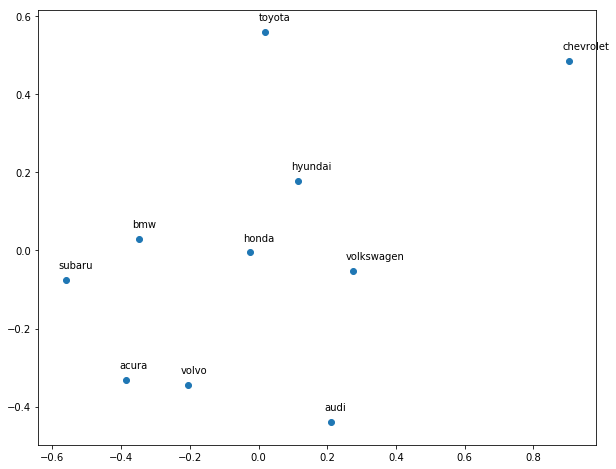

In [17]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=lift.columns.values
plt.scatter(x, y)
for i in range(10):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

### Part C

#### First, define what words denote an attribute and map to brands

In [18]:
#Attributes are not defined - need to download words to create a dictionary of attribute terms.
words=[]
for i in data['comments_final_words']:
    words.append(i)

import itertools
merged_list = list(itertools.chain.from_iterable(words))

from collections import Counter
counts = Counter(merged_list)

#output words to be assessed
output = pd.DataFrame.from_dict(data=counts, orient='index')
#output.to_csv("attribute_singleword_frequency", sep='\t')

In [19]:
#import words tagged with attribute - 1,000+ words manually assessed to find top 5 attribute categories
attributes = pd.read_csv("attribute_lookup.csv", sep=',')

#show top 5 most frequently mentioned attributes
attributes.groupby(["Attribute"]).sum().sort_values(by=["Count"], ascending=False)

,Count
Attribute,
Interior,569
Performance,368
Engine,291
Body Style,277
Transmission,215


In [20]:
#Display words associated with attribute
attributes.groupby(["Attribute", "Word"]).sum().sort_values(by=["Attribute", "Count"], ascending=True)

Count
Attribute    Word               
Body Style   2seater           3
             coupe            21
             pickup           38
             sedan            51
             wagon            71
             suv              93
Engine       diesel           15
             v8               17
             cylinder         22
             hybrid           30
             v6               69
             engine          138
Interior     seatbelt          6
             backseat         14
             floor            27
             leather          52
             trim             52
             interior        196
             seat            222
Performance  zippy             4
             torque           28
             performance      44
             hp               47
             turbo            58
             speed            73
             power           114
Transmission automatic        34
             auto             43
             transmission     68
             manual           70

In [21]:
#define function to check brand mention and attribute key word mention in a post
def check_brand_att(att, brand, text):
    if(att in text and brand in text):
        return 1
    else:
        return 0

In [22]:
#create dictionary with counts of brand and attribute key word
brand_att_id = {}
attribute_id_list = list(attributes["Word"])
top_5_brands = list(top_10_brands["Word"][:5])
comments = data['comments_final_words']

for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_id[att+","+brand] = 0
            
for comment in comments:
    for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_id[att+","+brand] += check_brand_att(att, brand, comment)

In [23]:
#Create dataframe attribute key words vs brand counts
df_mat = pd.DataFrame.from_dict(brand_att_id, orient = 'index').values.reshape(len(attribute_id_list),5)
df_attributes = pd.DataFrame(df_mat).set_index(pd.Series(attribute_id_list))
df_attributes.columns = list(top_5_brands)
df_attributes.head()

,audi,honda,volkswagen,chevrolet,subaru
seat,22,21,35,24,24
interior,38,24,40,19,18
engine,13,13,12,16,36
power,18,14,6,6,15
suv,8,10,7,9,7


#### Calculate lifts for long list of attribute keywords, delete any with low lift scores

In [24]:
#See long list of lifts to check whether to throw out key words
N=len(comments)
lift_att = df_attributes.copy()
top_5_brands = top_10_brands.iloc[:5]

for i in range(len(df_attributes)):
    for j in range(5):
        numerator = N*df_attributes.iloc[i,j]
        denominator = (top_10_brands['Frequency'].iloc[j] * attributes["Count"].iloc[i])
        lift_att.iloc[i,j] = numerator/denominator
lift_att

,audi,honda,volkswagen,chevrolet,subaru
seat,1.583362,1.587724,2.655147,1.945556,2.181858
interior,3.097691,2.055246,3.436983,1.744548,1.853466
engine,1.505133,1.581150,1.464454,2.086538,5.264918
power,2.522773,2.061256,0.886380,0.947178,2.655551
suv,1.374414,1.804786,1.267618,1.741586,1.519089
speed,2.407578,2.299248,1.845613,2.218733,2.211746
wagon,2.025325,1.182008,1.660402,1.520822,5.116611
manual,1.597756,1.918230,1.443533,0.771274,0.288317
v6,2.084030,4.378568,0.732227,1.043269,2.047468
transmission,3.524463,1.727817,2.724314,2.117222,0.593594


In [25]:
#drop zippy and 2seater
mask = ((attributes["Word"] == "zippy") | (attributes["Word"] == "2seater"))
attributes = attributes[-mask]

#### Now go through all comments, replace attribute keyword with its attribute class and remove duplicates in each post

In [26]:
#function to replace keywords with attribute class
def att_class(x):
    for key, value in enumerate(x): 
        if value in attributes["Word"].values:
            mask = attributes["Word"]==value
            x[key] = str(attributes[mask]["Attribute"].values[0])
    return x

#function to just count att class
def check_att_class(att, text):
    if(att in text):
        return 1
    else:
        return 0

In [27]:
data['comments_final_words_atts'] =  data['comments_final_words'].apply(att_class)
data['comments_final_words_atts'] = data['comments_final_words_atts'].apply(set).apply(list)
comments_new = data['comments_final_words_atts']

In [28]:
brand_att_key_only = {}
attribute_id_list = list(set(attributes["Attribute"]))

for att in attribute_id_list:
        brand_att_key_only[att] = 0

for comment in comments_new:
    for att in attribute_id_list:
        brand_att_key_only[att] += check_att_class(att, comment)
brand_att_key_only = pd.DataFrame(list(brand_att_key_only.items()), columns=['Att', 'Count'])
brand_att_key_only

,Att,Count
0,Performance,299
1,Body Style,234
2,Interior,449
3,Transmission,188
4,Engine,256


In [33]:
#count occurences of brand and attribute class
brand_att_key = {}
attribute_id_list = list(set(attributes["Attribute"]))
top_5_brands = top_10_brands["Word"].iloc[:5]

for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_key[att+","+brand] = 0

for comment in comments_new:
    for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_key[att+","+brand] += check_brand_att(att, brand, comment)

In [34]:
#Create dataframe attribute key words vs brand counts
df_mat = pd.DataFrame.from_dict(brand_att_key, orient = 'index').values.reshape(len(attribute_id_list),5)
df_attributes = pd.DataFrame(df_mat).set_index(pd.Series(attribute_id_list))
df_attributes.columns = list(top_5_brands)
df_attributes

,audi,honda,volkswagen,chevrolet,subaru
Performance,35,39,30,19,33
Body Style,23,31,17,19,27
Interior,59,47,68,42,40
Transmission,22,19,26,14,13
Engine,32,37,26,29,46


In [35]:
N=len(comments_new)
lift_att = df_attributes.copy()
top_5_brands = top_10_brands.iloc[:5]
att_class_counts = brand_att_key_only["Count"]

for i in range(len(att_class_counts)):
    for j in range(5):
        numerator = N*df_attributes.iloc[i,j]
        denominator = (top_5_brands['Frequency'].iloc[j] * att_class_counts.iloc[i])
        lift_att.iloc[i,j] = numerator/denominator
lift_att

,audi,honda,volkswagen,chevrolet,subaru
Performance,1.870283,2.189284,1.689754,1.143583,2.227465
Body Style,1.570444,2.223589,1.223507,1.461245,2.328714
Interior,2.099502,1.756953,2.550563,1.683404,1.797968
Transmission,1.869715,1.696307,2.329104,1.340157,1.395577
Engine,1.997196,2.425886,1.710436,2.038654,3.626487
